## Implementing Neural Networks from scartch on a spiral data generated and plotted 

###### Note : The comment's purpose is my understanding for the algorithm and notations 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

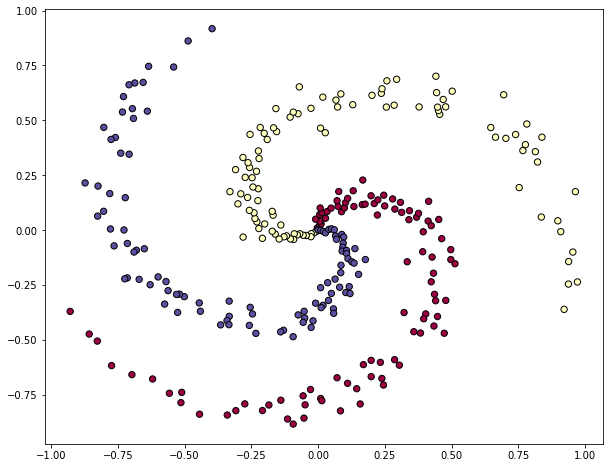

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,edgecolors='k', cmap=plt.cm.Spectral)
plt.show()

In [4]:
h = 100 #number of neurons in hidden layer
w = 0.01* np.random.randn(D, h) #(2, 200) 200 coefficients and 2 intercepts(0.01 to lessen the weights)
b = np.zeros((1,h)) #(1, 100) intercepts

In [5]:
w2 =  0.01* np.random.randn(h, K) #(100, 3) (number ofinputs, 3 neurons)(output layer)
b2 = np.zeros((1,K)) #(1, 3)

In [6]:
step_size = 1e-0 #equals to 1
reg = 1e-3 #regularization
m = X.shape[0] #300

In [7]:
for i in range(10000):
    
    #Forward Propogation
    
    # (1) Evaluate class scores
    hidden_layer_output = np.maximum(0 , np.dot(X, w) + b) #ThetaTransposeX matrix multiplication (300*2 , 2*300)
            # np.max(0, h_l_o)activation = 'relu'^^^^
    scores = np.dot(hidden_layer_output, w2) + b2 #(300, 3)
    
    # (2) Compute the class probablities
    exp_scores = np.exp(scores) #(300, 3)
    probs = exp_scores/ np.sum(exp_scores, axis = 1, keepdims=True) #SoftmaxProbabilty
    
    # (3) Calculate Loss (-log(output(0/1))==more correct less loss)
    correct_logprobs = -np.log(probs[range(m), y]) #(300, 1)
    data_loss = np.sum(correct_logprobs) / m #Scaler
    
    # (4) Regularization
    reg_loss = 0.5*reg*np.sum(w*w) + 0.5*reg*np.sum(w2*w2)
    loss = data_loss + reg_loss
    
    if i%1000 == 0:
        print(f'iter{i}: loss {loss}')
        
    #Back Propogation
    
    # (1) Find the gradient of loss (y ^ -y)
    dprobs = probs # (300,3)
    dprobs[range(m), y] -= 1
    dprobs /= m # (300, 3)
    
    # (2) Backprop into params w2, b2
    dw2 = np.dot(hidden_layer_output.T, dprobs) # (100, 300).(300, 3)==(100, 3)
    db2 = np.sum(dprobs, axis = 0, keepdims= True) #(1, 3)
    
    # (3a) Backprop into hidden layer
    dhidden = np.dot(dprobs, w2.T) #(300, 100)
    dhidden[hidden_layer_output <= 0] = 0   
    
    # (3b)
    dw = np.dot(X.T, dhidden) #(2, 100)
    db =  np.sum(dhidden, axis = 0, keepdims= True) #(1, 100)
    
    dw2 += reg*w2 #(100, 3)
    dw += reg*w #(2, 100)
    
    # (4) Perform update rule
    w -= step_size*dw
    b -= step_size*db
    
    w2 -=step_size*dw2
    b2 -=step_size*db2


iter0: loss 1.0986330250322798
iter1000: loss 0.2951308490321233
iter2000: loss 0.25740807519908815
iter3000: loss 0.26145885533066054
iter4000: loss 0.25366441173540444
iter5000: loss 0.2547890727453403
iter6000: loss 0.2552805972694412
iter7000: loss 0.2532158093612531
iter8000: loss 0.252326782521089
iter9000: loss 0.25387512083859115


In [8]:
hidden_layer = np.maximum(0, (np.dot(X, w) + b))
scores = np.dot(hidden_layer, w2) + b2
predicted_class = np.argmax(scores, axis=1)
print(np.mean(predicted_class == y))

0.9833333333333333


(-1.8839851326279309, 1.9160148673720725)

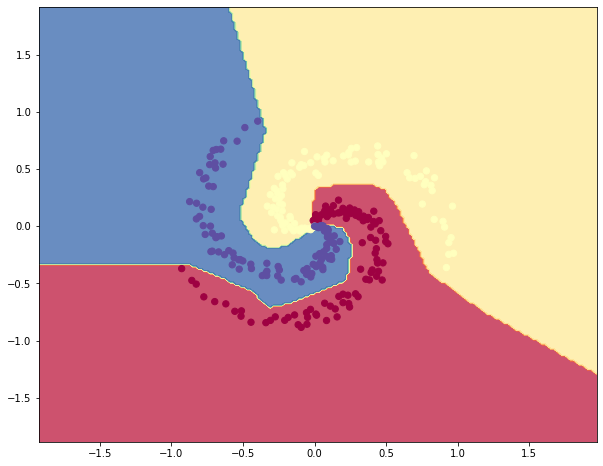

In [9]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b), w2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')